In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random



%matplotlib inline

In [171]:
full_df = pd.read_csv('Data/flow_time_series.csv')
red_df = pd.read_csv('Data/red_time_series.csv')

In [172]:
full_df = full_df.sort_values('time')
red_df = red_df.sort_values('time')

In [173]:
full_df['time'] = full_df['time'].astype('int64')
red_df['time'] = red_df['time'].astype('int64')

In [174]:
full_df = full_df[full_df['time']< 1900801 ]

In [175]:
full_df.head(5)

,Unnamed: 0,Unnamed: 0.1,time,user,Upload,Download,mean_duration
0,17398,17490,0,C13557,1522269.0,716338,6.844262
1002,14358,14437,0,C12630,26467756.0,6568934,7.564246
1001,14467,14546,0,C11468,35320320.0,11342816,5.689418
1000,14466,14545,0,C8752,24947020.0,21350094,29.146887
999,14465,14544,0,C720,2682239.0,1844391,24.475285


# examine Difference in when these users appear

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.72351134e-06, 6.91823498e-07, 4.94073250e-07, 4.95887472e-07,
        8.07933735e-07, 7.99467364e-07, 7.34760096e-07, 7.34760096e-07,
        6.02926597e-07, 4.06990572e-07, 1.13328430e-06, 7.16617871e-07,
        7.57135506e-07, 5.74503779e-08, 5.44266738e-08, 4.65650431e-08,
        4.53555615e-08, 5.44266738e-08, 5.56361554e-08, 1.08853348e-07]),
 array([      0.,   95040.,  190080.,  285120.,  380160.,  475200.,
         570240.,  665280.,  760320.,  855360.,  950400., 1045440.,
        1140480., 1235520., 1330560., 1425600., 1520640., 1615680.,
        1710720., 1805760., 1900800.]),
 <a list of 20 Patch objects>)

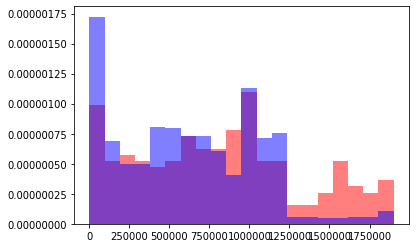

In [176]:
plt.hist(red_df['time'],normed=True,color='r',alpha=.5,bins=20)
plt.hist(full_df['time'],normed=True,color='b',alpha=.5,bins=20)

# Examine Differences in thier average byte movents

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0.00088365, 0.00100146, 0.00524296, 0.02067731, 0.03575819,
        0.06185519, 0.07628807, 0.17101487, 0.16100022, 0.11834959,
        0.11304772, 0.17248761, 0.05472711, 0.01531652, 0.00701025,
        0.00471278, 0.00147274, 0.00300439, 0.00041237, 0.00070692]),
 array([ 6.23636959,  7.21200797,  8.18764634,  9.16328472, 10.13892309,
        11.11456147, 12.09019985, 13.06583822, 14.0414766 , 15.01711497,
        15.99275335, 16.96839172, 17.9440301 , 18.91966848, 19.89530685,
        20.87094523, 21.8465836 , 22.82222198, 23.79786036, 24.77349873,
        25.74913711]),
 <a list of 20 Patch objects>)

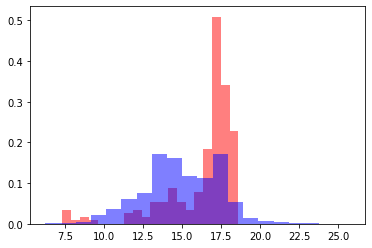

In [177]:
plt.hist(np.log(red_df['Upload']),normed=True,color='r',alpha=.5,bins=20)
plt.hist(np.log(full_df['Upload']),normed=True,color='b',alpha=.5,bins=20)

# bootstrap estimates

In [178]:
red_df['Log_Upload'] = np.log2(red_df['Upload'])
red_df['Log_Download'] = np.log2(red_df['Download'])

In [179]:
full_df['Log_Upload'] = np.log2(full_df['Upload'])
full_df['Log_Download'] = np.log2(full_df['Download'])

In [180]:
full_df['sqrt_Upload'] = np.sqrt(full_df['Upload'])
full_df['sqrt_Download'] = np.sqrt(full_df['Download'])

In [181]:
red_df['sqrt_Upload'] = np.sqrt(red_df['Upload'])
red_df['sqrt_Download'] = np.sqrt(red_df['Download'])

In [182]:
red_bs = []
full_bs = []

In [183]:
red_bs = []
full_bs = []

for i in range(1000):
    red_bs.append(np.mean(random.sample(list(red_df['Upload']),100)))
    full_bs.append(np.mean(random.sample(list(full_df['Upload']),100)))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(0, 1)

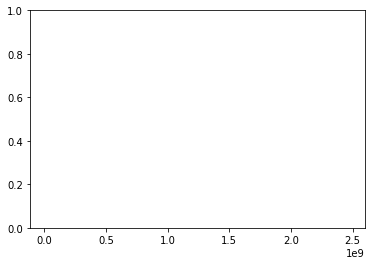

In [184]:
plt.hist(red_bs,normed=True,color='r',alpha=.5,bins=20)
plt.hist(full_bs,normed=True,color='b',alpha=.5,bins=20)
plt.ylim(0,1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0.0006125 , 0.00069416, 0.00363415, 0.01433242, 0.02478569,
        0.04287475, 0.05287886, 0.11853847, 0.11159685, 0.08203369,
        0.07835871, 0.1195593 , 0.03793395, 0.0106166 , 0.00485914,
        0.00326665, 0.00102083, 0.00208249, 0.00028583, 0.00049   ]),
 array([ 8.99717948, 10.40472813, 11.81227677, 13.21982542, 14.62737407,
        16.03492271, 17.44247136, 18.85002001, 20.25756865, 21.6651173 ,
        23.07266595, 24.48021459, 25.88776324, 27.29531189, 28.70286053,
        30.11040918, 31.51795783, 32.92550647, 34.33305512, 35.74060377,
        37.14815241]),
 <a list of 20 Patch objects>)

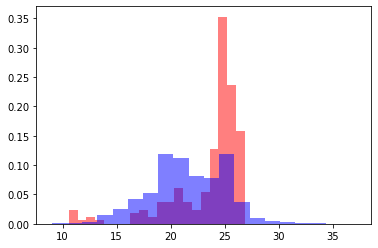

In [185]:
plt.hist(red_df['Log_Upload'],normed=True,color='r',alpha=.5,bins=20)
plt.hist(full_df['Log_Upload'],normed=True,color='b',alpha=.5,bins=20)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


(array([0.01434862, 0.0114789 , 0.04017614, 0.06887338, 0.08035228,
        0.12052842, 0.18653208, 0.25827519, 0.33575774, 0.37880361,
        0.26975408, 0.32140912, 0.31279995, 0.2123596 , 0.0947009 ,
        0.08609173, 0.03730642, 0.02582752, 0.00573945, 0.00860917]),
 array([18.21010256, 18.55856809, 18.90703362, 19.25549915, 19.60396468,
        19.95243021, 20.30089574, 20.64936127, 20.9978268 , 21.34629233,
        21.69475786, 22.04322339, 22.39168891, 22.74015444, 23.08861997,
        23.4370855 , 23.78555103, 24.13401656, 24.48248209, 24.83094762,
        25.17941315]),
 <a list of 20 Patch objects>)

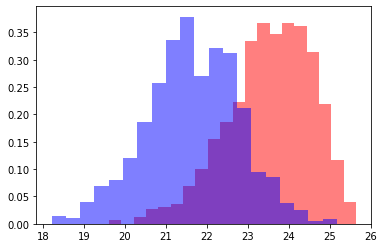

In [200]:
red_bs = []
full_bs = []

for i in range(1000):
    red_bs.append(np.mean(random.sample(list(red_df['Log_Upload']),10)))
    full_bs.append(np.mean(random.sample(list(full_df['Log_Upload']),10)))
    
plt.hist(red_bs,normed=True,color='r',alpha=.5,bins=20)
plt.hist(full_bs,normed=True,color='b',alpha=.5,bins=20)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(0, 1000000)

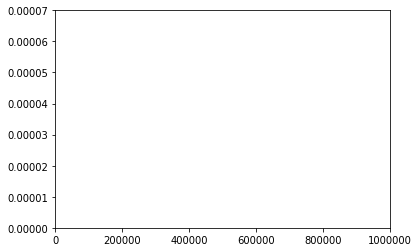

In [187]:
plt.hist(red_df['Upload'],normed=True,color='r',alpha=.5,bins=5)
plt.hist(full_df['Upload'],normed=True,color='b',alpha=.5,bins=5)
plt.ylim(0,.00007)
plt.xlim(0,1000000)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(0, 50000)

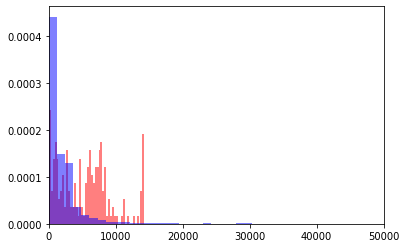

In [188]:
plt.hist(red_df['sqrt_Download'],normed=True,color='r',alpha=.5,bins=50)
plt.hist(full_df['sqrt_Download'],normed=True,color='b',alpha=.5,bins=500)
plt.xlim(0,50000)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0.20430586, 0.05866208, 0.042884  , 0.04895249, 0.05016619,
        0.05502098, 0.05097532, 0.06634883, 0.05259359, 0.06108947,
        0.05097532, 0.04692966, 0.05583012, 0.04612053, 0.05987578,
        0.06028034, 0.05259359, 0.07929495, 0.0679671 , 0.08091321,
        0.08091321, 0.10437804, 0.0906228 , 0.08738627, 0.10923283,
        0.07848581, 0.07241732, 0.06958536, 0.12541548, 0.09830955,
        0.10923283, 0.10680544, 0.09183649, 0.10154608, 0.10114151,
        0.13027027, 0.10033238, 0.10154608, 0.0881954 , 0.07484472,
        0.07646298, 0.07241732, 0.07363102, 0.08253148, 0.06837166,
        0.07889038, 0.0869817 , 0.08253148, 0.08859997, 0.08657714,
        0.08010408, 0.07160819, 0.05947121, 0.05340272, 0.05583012,
        0.0465251 , 0.05421185, 0.03843378, 0.03236528, 0.03317442,
        0.03115159, 0.03317442, 0.02912876, 0.02710593, 0.02629679,
        0.02791506, 0.02589223, 0.02063287, 0.021442  , 0.0202283 ,
        0.01739634, 0.01577808, 0.01658721, 0.01

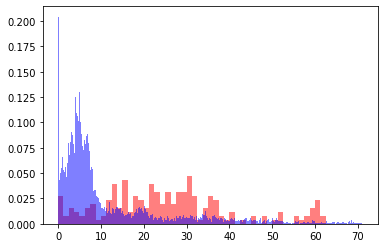

In [189]:
plt.hist(red_df['mean_duration'],normed=True,color='r',alpha=.5,bins=50)
plt.hist(full_df['mean_duration'],normed=True,color='b',alpha=.5,bins=500)


In [190]:
full_sum_df = full_df.groupby('time',as_index=False).agg({'mean_duration':'mean', 'Upload':'sum','Download':'sum','user':pd.Series.nunique})
red_sum_df = red_df.groupby('time',as_index=False).agg({'mean_duration':'mean', 'Upload':'sum','Download':'sum','user':pd.Series.nunique})
              

In [191]:
full_sum_df.head()

,time,mean_duration,Upload,Download,user
0,0,10.879148,2.858622e+11,353428238281,1495
1,86400,11.576008,2.204473e+11,240559791244,1355
2,172800,11.465731,1.503102e+11,202072086722,1144
3,259200,10.207941,8.960045e+10,122156346090,817
4,345600,10.008203,1.037212e+11,147535841575,820


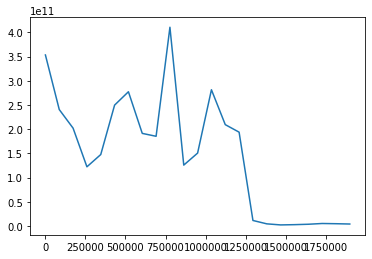

In [192]:

plt.plot(full_sum_df['time'],full_sum_df['Download'])

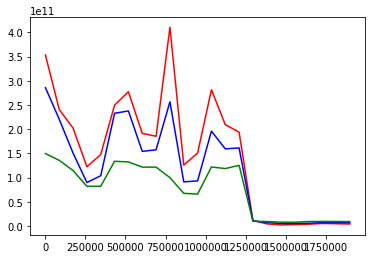

In [193]:
plt.plot(full_sum_df['time'],full_sum_df['Download'] , color='r')
plt.plot(full_sum_df['time'],full_sum_df['Upload'], color='b')

plt.plot(full_sum_df['time'],full_sum_df['user']*100000000, color='g')

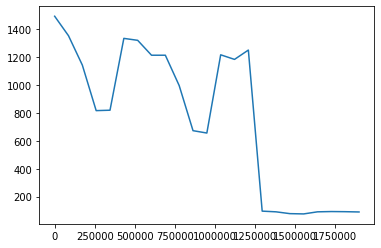

In [194]:

plt.plot(full_sum_df['time'],full_sum_df['user'])

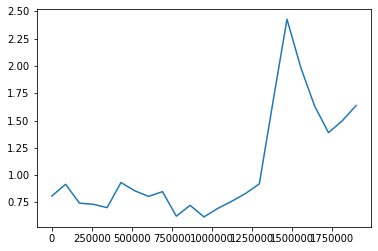

In [195]:
plt.plot(full_sum_df['time'],full_sum_df['Upload']/full_sum_df['Download'])

([<matplotlib.axis.XTick at 0x11cdce7f0>,
 <a list of 22 Text xticklabel objects>)

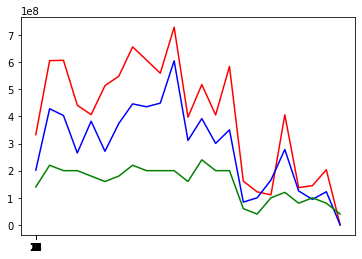

In [196]:
plt.plot(red_sum_df['time'],red_sum_df['Download'] , color='r')
plt.plot(red_sum_df['time'],red_sum_df['Upload'], color='b')

plt.plot(full_sum_df['time'],red_sum_df['user']*20000000, color='g')
plt.xticks(range(22))

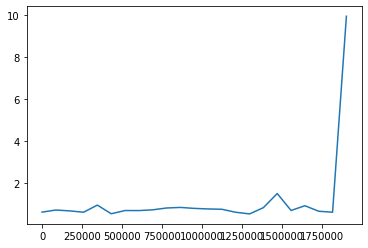

In [197]:
plt.plot(full_sum_df['time'],red_sum_df['Upload']/red_sum_df['Download'])

In [198]:
np.log(1024**3) / np.log(1024)

3.0